In [305]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib as plt
%matplotlib inline
import pandas as pd

In [306]:
file_path = 'lung_disease.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

In [307]:
data

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,F,F,F,T,T,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,F,F,F,F,F,MRI,T,F,51,F
2,Patient-3,F,2.76,2.08,F,F,F,T,F,X-ray,F,F,59,F
3,Patient-4,F,3.68,3.04,F,F,F,F,F,X-ray,F,F,54,F
4,Patient-5,F,2.44,0.96,F,T,F,T,T,X-ray,F,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Patient-466,F,3.88,2.12,F,F,F,T,F,CT,F,F,63,F
466,Patient-467,F,3.76,3.12,F,F,F,F,F,X-ray,F,F,61,F
467,Patient-468,F,3.04,2.08,F,F,F,T,F,CT,F,F,52,F
468,Patient-469,F,1.96,1.68,F,F,F,T,T,MRI,F,F,79,F


Using get_dummies to tackle categorical values and $drop$ _ $first$ = True to avoid multicollinearity. That is when we have categorical values like $ n $ names of places, we have only $ n-1 $ degree of freedom. So we drop one column.
I also dropped columns like Patient and Scan which I thought would be of no use.

In [308]:
clmn = ['smoke','O2','ABG-P-O2','ABG-P-CO2','ABG-pH Level','Asthama','Other diseaes','PEFR','Risk']
dis = pd.get_dummies(data,columns=clmn,drop_first=True)
dis = dis.drop(['Patient','Scan'], axis=1).astype(float)
dis

,FVC,FEC1,AGE,smoke_T,O2_T,ABG-P-O2_T,ABG-P-CO2_T,ABG-pH Level_T,Asthama_T,Other diseaes_T,PEFR_T,Risk_T
0,2.85,2.16,60.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,3.40,1.88,51.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.76,2.08,59.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.68,3.04,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.44,0.96,73.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
465,3.88,2.12,63.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
466,3.76,3.12,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,3.04,2.08,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
468,1.96,1.68,79.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [309]:
dis['FVC'] = dis['FVC']/10
dis['Tidal'] = dis['FVC']
dis = dis.drop(['FVC'], axis=1)
dis

,FEC1,AGE,smoke_T,O2_T,ABG-P-O2_T,ABG-P-CO2_T,ABG-pH Level_T,Asthama_T,Other diseaes_T,PEFR_T,Risk_T,Tidal
0,2.16,60.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.285
1,1.88,51.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.340
2,2.08,59.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.276
3,3.04,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.368
4,0.96,73.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.244
...,...,...,...,...,...,...,...,...,...,...,...,...
465,2.12,63.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.388
466,3.12,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376
467,2.08,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.304
468,1.68,79.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.196


In [310]:

X = dis.drop(['Tidal'],axis=1)
y = dis['Tidal']
y

0      0.285
1      0.340
2      0.276
3      0.368
4      0.244
       ...  
465    0.388
466    0.376
467    0.304
468    0.196
469    0.472
Name: Tidal, Length: 470, dtype: float64

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69)   

In [312]:
def pt(X_train, y_train, y_pred):

    import numpy as np
    import matplotlib.pyplot as plt

    x_axis = X_train[:,1]

    plt.scatter(x_axis,y_pred,c='r')
    plt.scatter(x_axis,y_train)

In [313]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [314]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 150:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

In [315]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [316]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='relu'))

c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [317]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

In [318]:
# model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)
lr_scheduler = LearningRateScheduler(scheduler)
# history = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.1, callbacks=[lr_scheduler], verbose=1)
history = model.fit(X_train, y_train, epochs=250, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 2/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 3/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 4/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 5/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 6/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 7/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0170 - va

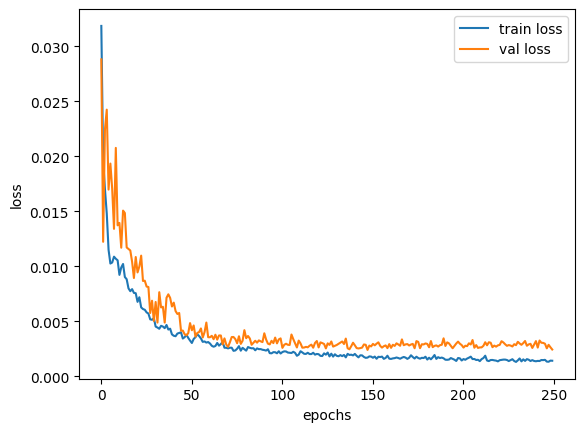

In [319]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label = 'train loss')
plt.plot(history.history['val_loss'],label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [320]:
loss, mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022 
Mean Squared Error: 0.00222610286436975


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


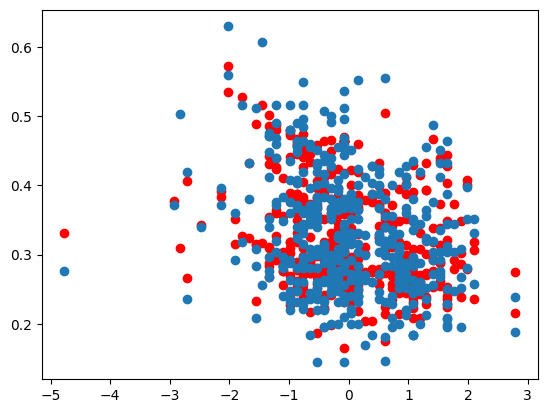

In [321]:
y_pred = model.predict(X_train)
pt(X_train,y_train,y_pred)

In [322]:
comp = np.column_stack((y_pred,np.array(y_train).reshape(-1,1)))
comp

array([[0.29607353, 0.285     ],
       [0.21422687, 0.2       ],
       [0.31003642, 0.3       ],
       [0.34811169, 0.324     ],
       [0.25693044, 0.228     ],
       [0.31590393, 0.308     ],
       [0.26952738, 0.292     ],
       [0.4014135 , 0.452     ],
       [0.37207803, 0.376     ],
       [0.22494388, 0.198     ],
       [0.28411227, 0.26      ],
       [0.22690906, 0.22      ],
       [0.24442241, 0.212     ],
       [0.38791949, 0.408     ],
       [0.26064914, 0.26      ],
       [0.44271201, 0.472     ],
       [0.30580252, 0.32      ],
       [0.27226681, 0.264     ],
       [0.35480458, 0.352     ],
       [0.27596119, 0.26      ],
       [0.33885896, 0.336     ],
       [0.27759898, 0.248     ],
       [0.46490133, 0.49      ],
       [0.30790472, 0.304     ],
       [0.26331723, 0.248     ],
       [0.27641296, 0.24      ],
       [0.42190337, 0.38      ],
       [0.38034213, 0.368     ],
       [0.46475118, 0.468     ],
       [0.21656826, 0.184     ],
       [0.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


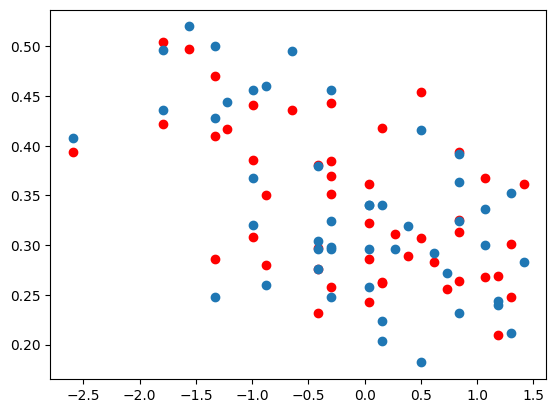

In [323]:
y_pred_test = model.predict(X_test)
pt(X_test,y_test,y_pred_test)